In [1]:
!apt-get install poppler-utilsZ

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [2]:
!pip3 install pdf2image
!pip3 install easyocr
!pip3 install spacy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [25]:
!python3 -m pip install --upgrade Pillow
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
2023-09-26 12:39:07.336381: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-26 12:39:07.369097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 12:39:08.041735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-26 12:39:08.725844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [4]:
from pdf2image import convert_from_path
import easyocr
import numpy as numpy
import PIL
from PIL import ImageDraw
import spacy
import numpy as np

/usr/lib/python3/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
2023-09-26 12:35:32.494326: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-26 12:35:32.521247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 12:35:33.094638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-26 12:35:33.649100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successfu

In [5]:
reader = easyocr.Reader(['en'])

In [6]:
PIL.__version__

'10.0.1'

In [7]:
!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

--2023-09-26 12:35:42--  https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf
Resolving writing.colostate.edu (writing.colostate.edu)... 129.82.210.34
Connecting to writing.colostate.edu (writing.colostate.edu)|129.82.210.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98553 (96K) [application/pdf]
Saving to: ‘functionalSample.pdf.1’

functionalSample.pd 100%[===================>]  96.24K   149KB/s    in 0.6s    

2023-09-26 12:35:43 (149 KB/s) - ‘functionalSample.pdf.1’ saved [98553/98553]



In [8]:
# !cd /kaggle/working

In [9]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [10]:
# for dirname, _, filenames in os.walk('/kaggle/working'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [11]:
!ls

functionalSample.pdf
keras-ocr-vs-easyocr-vs-pytesseract.ipynb
pdf2text-ocr-named-entity-recognition.ipynb
readme.md


In [12]:
images = convert_from_path('functionalSample.pdf')

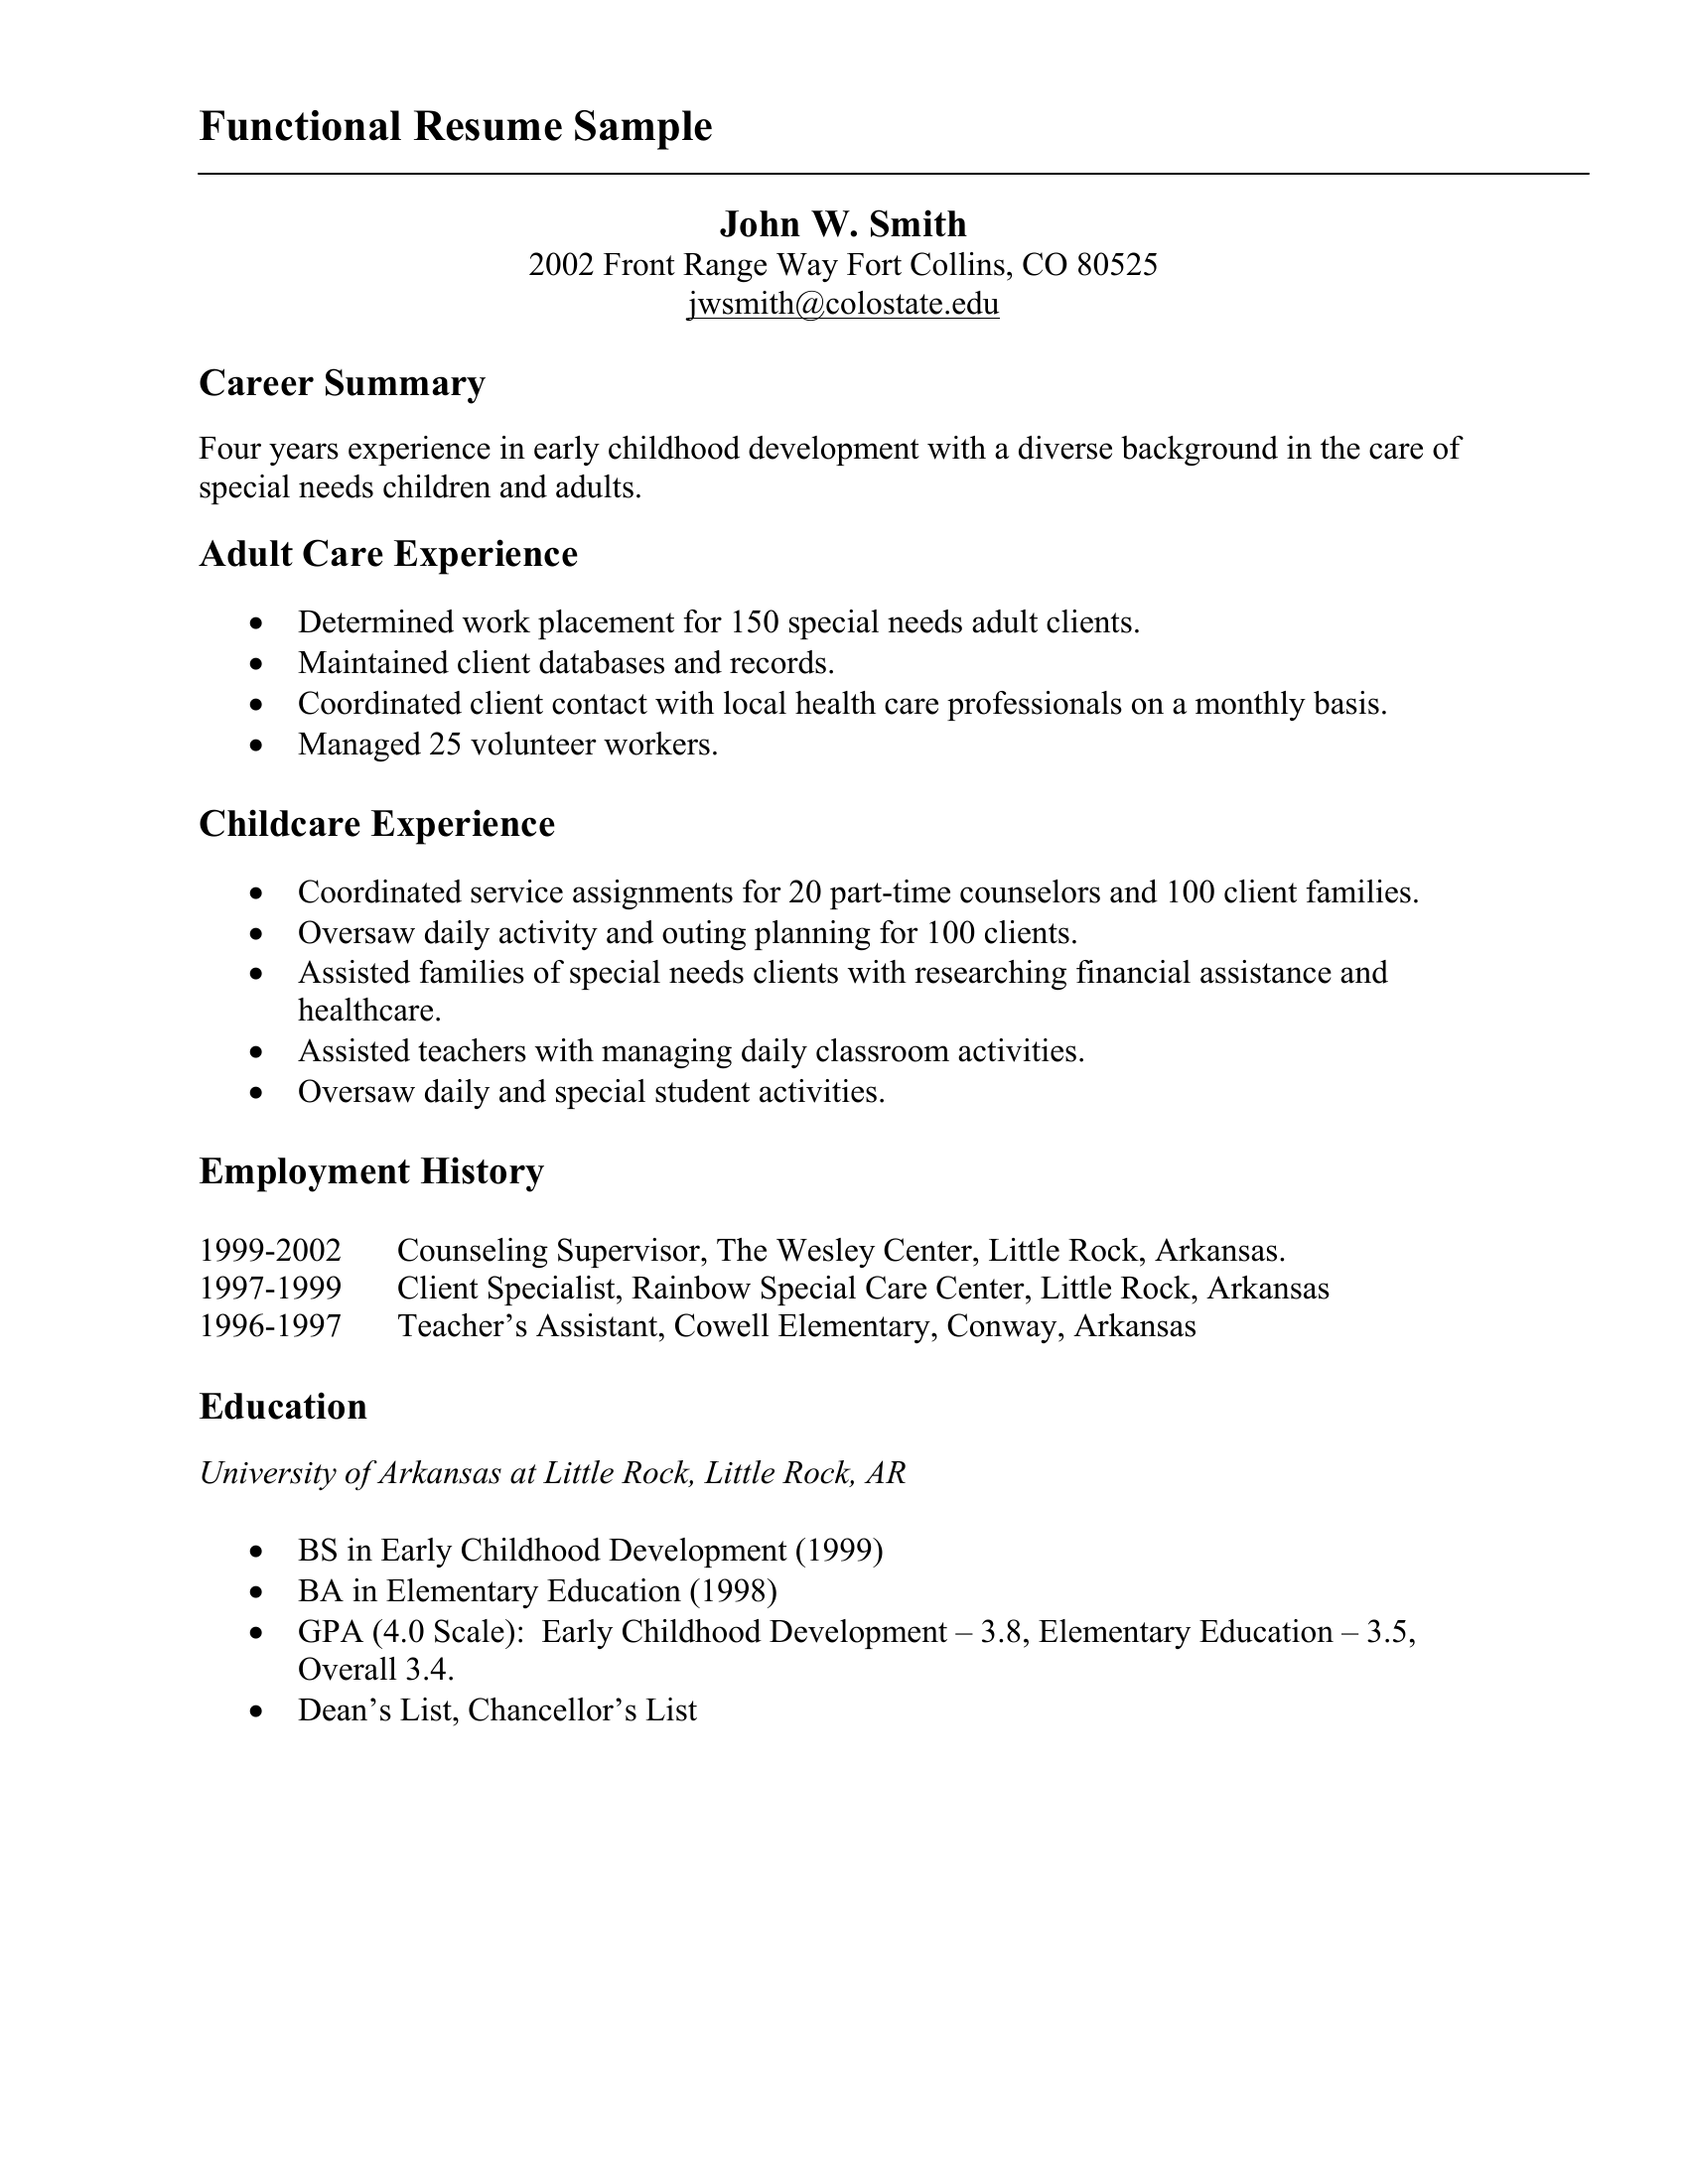

In [13]:
from IPython.display import display, Image
display(images[0])

In [14]:
bounds = reader.readtext(np.array(images[0]), min_size = 0, slope_ths=0.2, ycenter_ths = 0.7, height_ths = 0.6, width_ths = 0.8, decoder='beamsearch', beamWidth=10)
bounds

[([[194, 102], [726, 102], [726, 159], [194, 159]],
  'Functional Resume Sample',
  0.9769079727071722),
 ([[721, 205], [979, 205], [979, 245], [721, 245]],
  'John W. Smith',
  0.8383037908959591),
 ([[529, 247], [1171, 247], [1171, 291], [529, 291]],
  '2002 Front Range Way Fort Collins, CO 80525',
  0.8406487165151093),
 ([[688, 285], [1013, 285], [1013, 327], [688, 327]],
  'iwsmith@colostate_edu',
  0.5983294276075538),
 ([[196, 362], [497, 362], [497, 414], [196, 414]],
  'Career Summary',
  0.9999670344257928),
 ([[196, 430], [1480, 430], [1480, 478], [196, 478]],
  'Four years experience in early childhood development with a diverse background in the care of',
  0.7899579596247241),
 ([[192, 467], [649, 467], [649, 519], [192, 519]],
  'special needs children and adults',
  0.9893197054511705),
 ([[198, 536], [590, 536], [590, 586], [198, 586]],
  'Adult Care Experience',
  0.963342368475383),
 ([[296, 604], [1152, 604], [1152, 654], [296, 654]],
  'Determined work placement fo

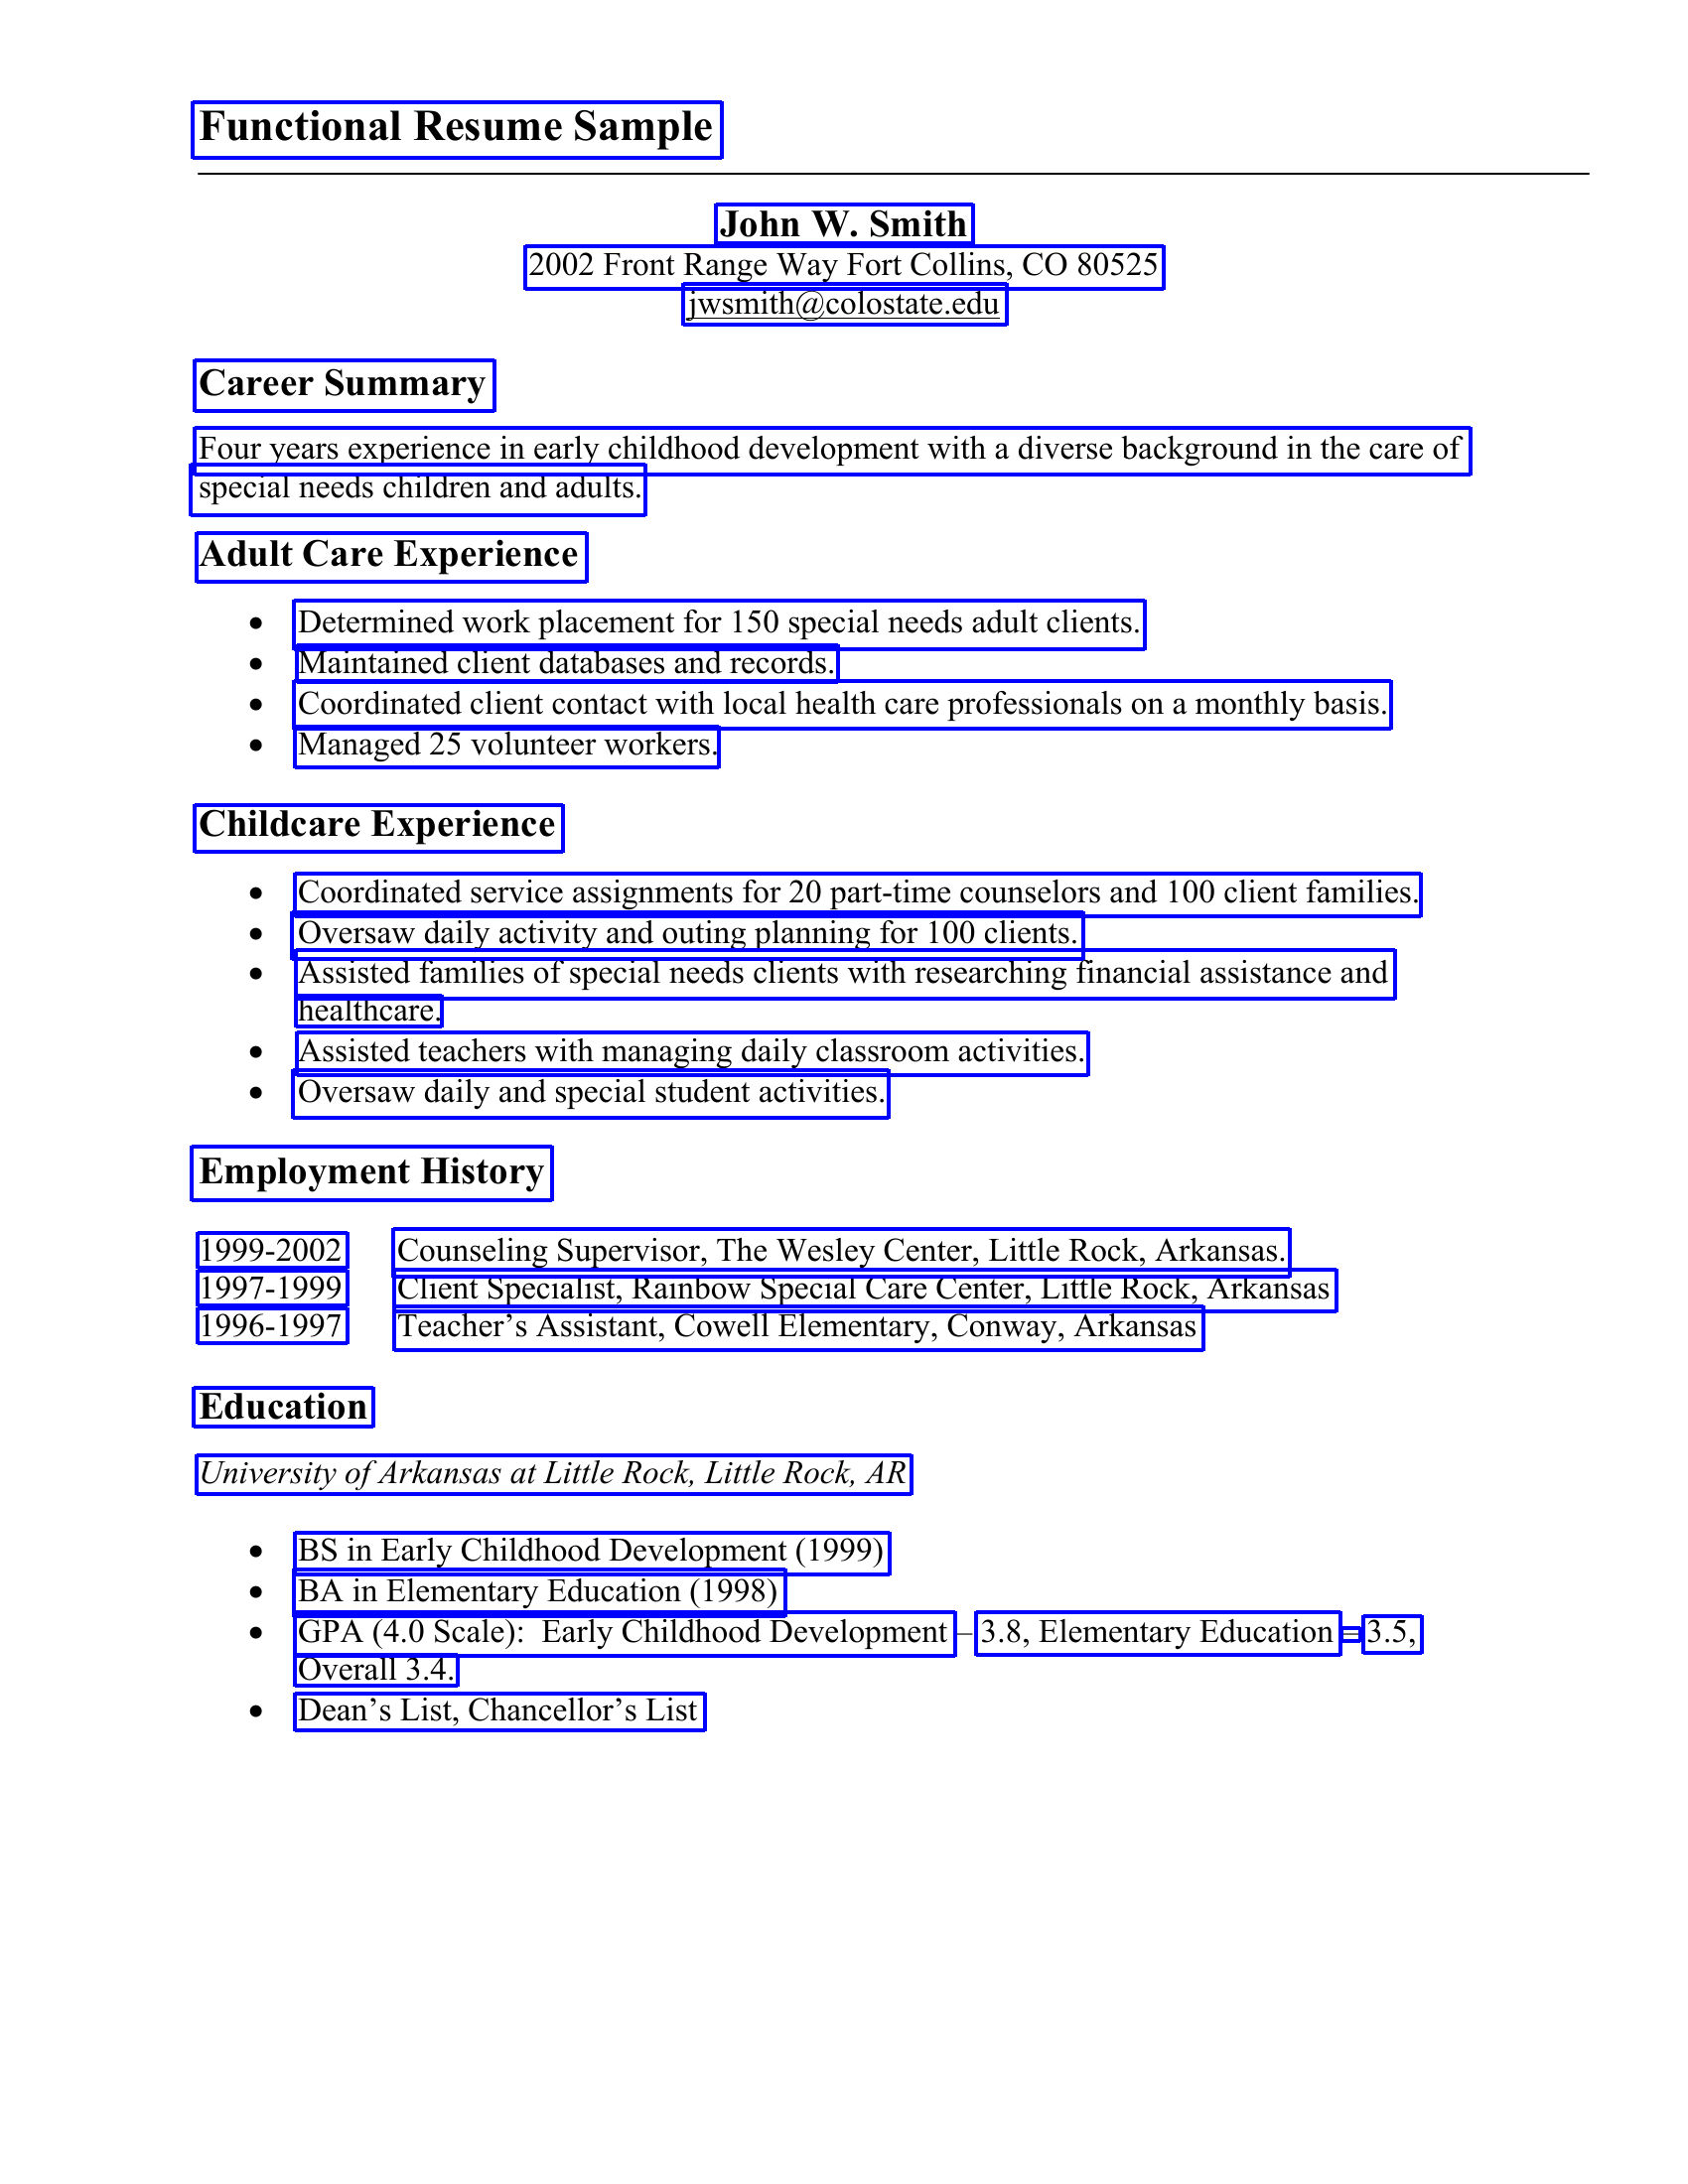

In [15]:
def draw_boxes(image, bounds, color = 'blue', width=4):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0] # get postiion 
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[0], bounds)


In [22]:
bounds[1][1]

'John W. Smith'

In [23]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'

print(text)

Functional Resume Sample
John W. Smith
2002 Front Range Way Fort Collins, CO 80525
iwsmith@colostate_edu
Career Summary
Four years experience in early childhood development with a diverse background in the care of
special needs children and adults
Adult Care Experience
Determined work placement for 150 special needs adult clients.
Maintained client databases and records.
Coordinated client contact with local health care professionals o a monthly basis.
Managed 25 volunteer workers.
Childcare Experience
Coordinated service assignments for 20 part-time counselors and 100 client families
Oversaw daily activity and outing planning for 100 clients.
Assisted families of special needs clients with researching financial assistance and
healthcare.
Assisted teachers with managing daily classroom activities.
Oversaw daily and special student activities
Employment History
1999-2002
Counseling Supervisor; The Wesley Center, Little Rock Arkansas.
1997-1999
Client Specialist; Rainbow Special Care Cen

In [26]:
nlp = spacy.load('en_core_web_sm')

In [27]:
doc = nlp(text)

In [28]:
from spacy import displacy
displacy.render(nlp(doc.text), style = 'ent', jupyter=True)